### Classification Error Metric Challenges

**Settings:  Where applicable, use test_size=0.30, random_state=4444.  This will permit comparison of results across users.

*These reference the Classification Challenges.*

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_rows', 999)
pd.set_option('precision', 3)

In [3]:
# Define column names
cols = ['handicapped',
       'water_project',
       'budget',
       'physician_fee',
       'el_salvador',
       'religion_school',
       'anti_satellite',
       'nicaragua',
       'mx_missile',
       'immigration',
       'synfuels',
       'education',
       'superfund',
       'crime',
       'duty_free',
       'south_africa', 
       'party']

In [4]:
# Load CSV voting data
df = pd.read_csv('/home/cneiderer/Metis/Neiderer_Metis/Challenges/challenges_data/house-votes-84.data', names=cols)

In [5]:
# Inspect DF
df.sample(5, random_state=4444)

,handicapped,water_project,budget,physician_fee,el_salvador,religion_school,anti_satellite,nicaragua,mx_missile,immigration,synfuels,education,superfund,crime,duty_free,south_africa,party
325,n,y,n,n,y,y,n,n,?,n,n,y,y,y,n,y,democrat
122,n,n,n,y,y,y,n,n,n,y,n,y,n,y,n,y,republican
96,n,n,?,n,y,y,n,n,n,n,y,y,y,y,n,y,democrat
355,y,n,y,y,n,n,n,y,y,y,n,n,n,y,y,y,republican
387,y,y,y,n,y,y,n,y,y,n,y,n,n,y,n,?,democrat


In [6]:
# Convert 'y' and 'n' to numeric
df.iloc[:, :-1] = df.iloc[:, :-1].replace({'n': 0, 'y': 1, '?': np.nan})

In [7]:
# Impute p('y') for '?'
df.iloc[:, :-1] = df.iloc[:, :-1].fillna(df.iloc[:, :-1].mean(axis=0))

In [8]:
# Convert 'democrat' and 'republican' to numeric class vals
df['party'] = df['party'].str.replace('.', '') # replace '.' that occurs at end of some class values
df['party'] = df['party'].replace({'democrat': 1, 'republican': 0})
# df['party'][df['party'].str.contains('dem')] = 1
# df['party'][df['party'].str.contains('rep')] = 0

In [9]:
# Inspect DF
df.sample(5, random_state=4444)

,handicapped,water_project,budget,physician_fee,el_salvador,religion_school,anti_satellite,nicaragua,mx_missile,immigration,synfuels,education,superfund,crime,duty_free,south_africa,party
325,0,1,0,0,1,1,0,0,0.501,0,0,1,1,1,0,1,1
122,0,0,0,1,1,1,0,0,0,1,0,1,0,1,0,1,0
96,0,0,0.597,0,1,1,0,0,0,0,1,1,1,1,0,1,1
355,1,0,1,1,0,0,0,1,1,1,0,0,0,1,1,1,0
387,1,1,1,0,1,1,0,1,1,0,1,0,0,1,0,0.813,1


#### Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
%matplotlib inline

/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [11]:
# Define independent variables and target
X = df.iloc[:, :-1]
X['Intercept'] = 1
y = df.iloc[:, -1]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

In [12]:
# Define models to test
model_list = [['KNN', KNeighborsClassifier(9)], # K=9 was best performance from Challenge07
              ['Logistic', LogisticRegression()],
              ['GaussianNB', GaussianNB()], 
              ['SVC', SVC(probability=True)], 
              ['DecisionTree', DecisionTreeClassifier()], 
              ['RandomForest', RandomForestClassifier()]]

# Calculate metrics for each model
roc = {}
for model in model_list:
    
    model_name = model[0]
    model = model[1]
    
    accuracy = []
    precision = []
    recall = []
    f1 = []
    auc = []
        
    # Perform K-Fold CV and calculate metrics for each fold
    kf = KFold(5, random_state=4444, shuffle=True)
    for train_idx, test_idx in kf.split(X, y=y):
        X_train = X.iloc[train_idx, :] 
        X_test = X.iloc[test_idx, :] 
        y_train = y.iloc[train_idx] 
        y_test = y.iloc[test_idx] 
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy.append(accuracy_score(y_test, y_pred))
        precision.append(precision_score(y_test, y_pred))
        recall.append(recall_score(y_test, y_pred))
        f1.append(f1_score(y_test, y_pred))
        auc.append(roc_auc_score(y_test, y_pred))
        
    
    # Calculate mean metric across K-folds
    mean_accuracy = np.mean(accuracy)
    mean_precision = np.mean(precision)
    mean_recall = np.mean(recall)
    mean_f1 = np.mean(f1)
    mean_auc = np.mean(auc)
    
    # Capture TPR and FPR from last fold for plotting
    y_score = model.predict_proba(X_test)[:,1]
    roc[model_name] = roc_curve(y_test, y_score)
    
    # Print formatted results
    print(model)
    print('\t==============================')
    print('\tAccuracy:', mean_accuracy)
    print('\tPrecision:', mean_precision)
    print('\tRecall:', mean_recall)
    print('\tF1:', mean_f1)
    print('\tAUC:', mean_auc)
    print('\n')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='uniform')
	Accuracy: 0.931034482759
	Precision: 0.967620387285
	Recall: 0.918305636783
	F1: 0.942060223689
	AUC: 0.936067605359


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
	Accuracy: 0.95632183908
	Precision: 0.965415127463
	Recall: 0.96215452331
	F1: 0.963698703486
	AUC: 0.955214270845


GaussianNB(priors=None)
	Accuracy: 0.942528735632
	Precision: 0.95822486387
	Recall: 0.948938997857
	F1: 0.953280096087
	AUC: 0.941665331647


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=

#### Challenge 2

For each, draw the ROC curve and calculate the AUC.

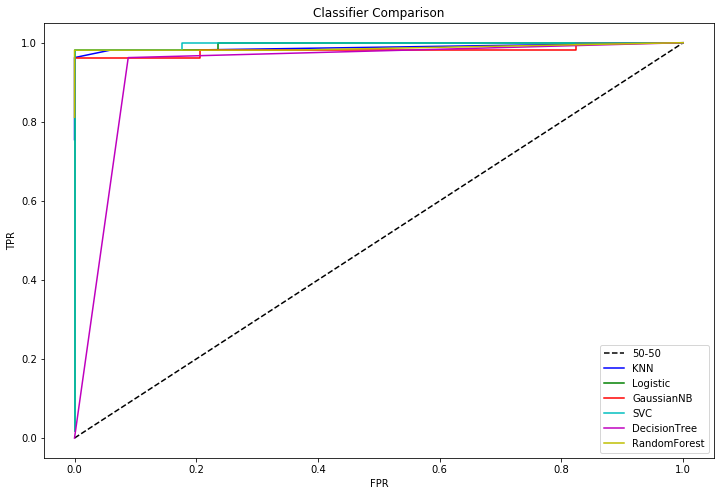

In [13]:
# Plot the ROC curve from the last K-Fold split
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# Plot 50-50 Line
ax.plot([0,1],[0,1], ls='--', color='k', label='50-50')
# Plot Classifier ROC Curves
for key, c in zip(roc.keys(), colors):
    ax.plot(roc[key][0], roc[key][1], color=c, label=key)
    
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('Classifier Comparison')
ax.legend(loc='best');

#### Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the `cross_val_score` function (like in Challenge 9).

#### Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

In [14]:
df3 = pd.read_csv('/home/cneiderer/Metis/Neiderer_Metis/Challenges/challenges_data/2013_movies.csv',
                 header='infer')

In [15]:
df3.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,1.300e+08,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,2.000e+08,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,1.500e+08,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
3,Despicable Me 2,7.600e+07,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00
4,Man of Steel,2.250e+08,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00


In [16]:
df3 = df3[['Budget', 'DomesticTotalGross', 'Runtime', 'Rating']]
df3['Rating'] = df3['Rating'].replace({'G': 0, 'PG': 1, 'PG-13': 2, 'R': 3})

In [17]:
# Replace NaN with mean of column
df3.iloc[:, :-1] = df3.iloc[:, :-1].fillna(df3.iloc[:, :-1].mean(axis=0)) 

In [18]:
df3.head()

,Budget,DomesticTotalGross,Runtime,Rating
0,1.300e+08,424668047,146,2
1,2.000e+08,409013994,129,2
2,1.500e+08,400738009,108,1
3,7.600e+07,368061265,98,1
4,2.250e+08,291045518,143,2


In [19]:
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

#### One-vs-All

In [20]:
# Remove the one G-Rated movie since there aren't enough examples for both 
# the training and test sets, which creates NaNs in the metric calculations
df3 = df3[df3['Rating'] != 0]

X = df3.iloc[:, :-1]
X['Intercept'] = 1

y = label_binarize(df3['Rating'], np.unique(df3['Rating']))
n_class = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

In [21]:
logreg = OneVsRestClassifier(LogisticRegression())
logreg.fit(X_train, y_train)
y_score = logreg.decision_function(X_test)

In [22]:
print('Micro Average Precision:', average_precision_score(y_test, y_score, average='micro'))
print('Macro Average Precision:', average_precision_score(y_test, y_score, average='macro'))
print('Precision for each Class:', average_precision_score(y_test, y_score, average=None))

Micro Average Precision: 0.588609873343
Macro Average Precision: 0.50235217284
Precision for each Class: [ 0.07626263  0.71406076  0.71673313]


In [23]:
precision, recall, _ = precision_recall_curve(y_test.ravel(), y_score.ravel())

In [24]:
precision

array([ 0.33333333,  0.3258427 ,  0.32954545,  0.33333333,  0.3372093 ,
        0.34117647,  0.3452381 ,  0.34939759,  0.35365854,  0.35802469,
        0.3625    ,  0.36708861,  0.37179487,  0.37662338,  0.36842105,
        0.36      ,  0.36486486,  0.35616438,  0.36111111,  0.36619718,
        0.37142857,  0.37681159,  0.38235294,  0.3880597 ,  0.39393939,
        0.4       ,  0.40625   ,  0.41269841,  0.41935484,  0.40983607,
        0.41666667,  0.40677966,  0.4137931 ,  0.42105263,  0.42857143,
        0.43636364,  0.44444444,  0.45283019,  0.46153846,  0.47058824,
        0.48      ,  0.48979592,  0.5       ,  0.5106383 ,  0.52173913,
        0.51111111,  0.52272727,  0.51162791,  0.5       ,  0.51219512,
        0.525     ,  0.51282051,  0.5       ,  0.51351351,  0.5       ,
        0.51428571,  0.52941176,  0.51515152,  0.5       ,  0.51612903,
        0.5       ,  0.51724138,  0.53571429,  0.51851852,  0.53846154,
        0.56      ,  0.58333333,  0.60869565,  0.59090909,  0.61

In [25]:
recall

array([ 1.        ,  0.96666667,  0.96666667,  0.96666667,  0.96666667,
        0.96666667,  0.96666667,  0.96666667,  0.96666667,  0.96666667,
        0.96666667,  0.96666667,  0.96666667,  0.96666667,  0.93333333,
        0.9       ,  0.9       ,  0.86666667,  0.86666667,  0.86666667,
        0.86666667,  0.86666667,  0.86666667,  0.86666667,  0.86666667,
        0.86666667,  0.86666667,  0.86666667,  0.86666667,  0.83333333,
        0.83333333,  0.8       ,  0.8       ,  0.8       ,  0.8       ,
        0.8       ,  0.8       ,  0.8       ,  0.8       ,  0.8       ,
        0.8       ,  0.8       ,  0.8       ,  0.8       ,  0.8       ,
        0.76666667,  0.76666667,  0.73333333,  0.7       ,  0.7       ,
        0.7       ,  0.66666667,  0.63333333,  0.63333333,  0.6       ,
        0.6       ,  0.6       ,  0.56666667,  0.53333333,  0.53333333,
        0.5       ,  0.5       ,  0.5       ,  0.46666667,  0.46666667,
        0.46666667,  0.46666667,  0.46666667,  0.43333333,  0.43

#### Multilevel Class

In [26]:
# Remove the one G-Rated movie since there aren't enough examples for both 
# the training and test sets, which creates NaNs in the metric calculations
df3 = df3[df3['Rating'] != 0]

X = df3.iloc[:, :-1]
X['Intercept'] = 1
y = df3['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=129)

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# Note: G-Rated is not calculated since there's only one G-Rated example
# and it can't be in both the training and test splits of the data
target_names = ['PG', 'PG-13', 'R']
print(classification_report(y_test, y_pred, target_names=target_names))

             precision    recall  f1-score   support

         PG       0.00      0.00      0.00         4
      PG-13       0.57      1.00      0.72        17
          R       0.00      0.00      0.00         9

avg / total       0.32      0.57      0.41        30



/home/cneiderer/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [28]:
cols = ['Age', 'Year', 'NumNodes', 'Survived']
df4 = pd.read_csv('/home/cneiderer/Metis/Neiderer_Metis/Challenges/challenges_data/haberman.data', 
                  header=0, names=cols)

In [29]:
df4['Survived'] = df4['Survived'].replace({2: 0})

In [30]:
X = df4.iloc[:, :-1]
X['Intercept'] = 1
y = df4.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)

In [31]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.75

In [32]:
from sklearn.metrics import roc_curve, auc

In [33]:
y_score = logreg.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

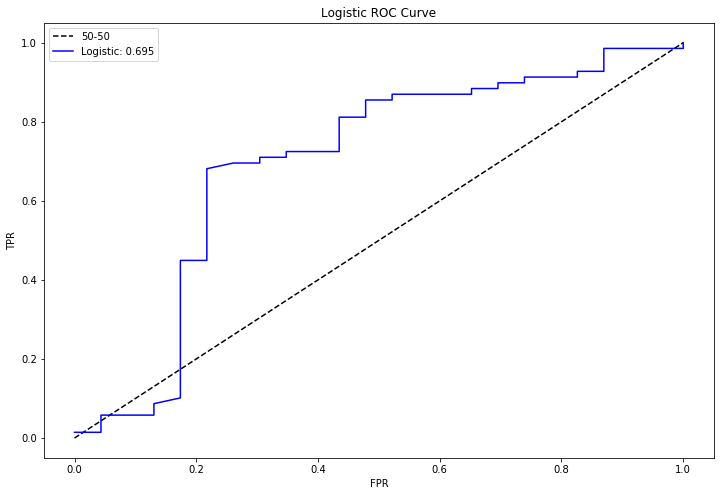

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot 50-50 Line
ax.plot([0,1],[0,1], ls='--', color='k', label='50-50')
# Plot Logistic ROC curve
ax.plot(fpr, tpr, color='b', label='Logistic: %.3f' % roc_auc)
    
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('Logistic ROC Curve')
ax.legend(loc='best');